<a href="https://colab.research.google.com/github/AmitShashi/AI/blob/main/cnn1%20(11/12/2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, Sequential

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation #,Conv2D, MaxPooling2D

tf.__version__

'2.7.0'

In [38]:
#data loading
#data splitting
(training_images, training_labels), (test_images,test_labels)= keras.datasets.fashion_mnist.load_data()

In [39]:
#creating validation set
(validation_images, training_images) = training_images[:5000],training_images[5000:]
(validation_labels, training_labels) = training_labels[:5000],training_labels[5000:]

In [40]:
#data exploration
print(training_images.shape," ",training_images.dtype)
print(test_images.shape," ",test_images.dtype)
print(validation_images.shape," ",validation_images.dtype)
#data exploration
print(training_labels.shape," ",training_labels.dtype)
print(test_labels.shape," ",test_labels.dtype)
print(validation_labels.shape," ",validation_labels.dtype)

(55000, 28, 28)   uint8
(10000, 28, 28)   uint8
(5000, 28, 28)   uint8
(55000,)   uint8
(10000,)   uint8
(5000,)   uint8


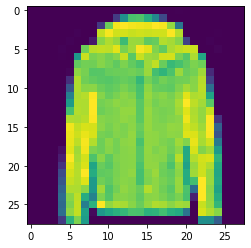

In [41]:
plt.imshow(training_images[0])

In [42]:
#data normalization
training_images=training_images/255
test_images=test_images/255
validation_images=validation_images/255

In [43]:
#plt.imshow(training_images[0])
print("training_images.shape:   ", training_images.shape,"   training_images.dtype:   ",training_images.dtype,"   ")
print("training_labels.shape:   ", training_labels.shape,"          training_labels.dtype:   ",training_labels.dtype,"   ")

training_images.shape:    (55000, 28, 28)    training_images.dtype:    float64    
training_labels.shape:    (55000,)           training_labels.dtype:    uint8    


In [44]:
#data exploration
print(training_images.shape)
print(training_images.dtype)
print(test_images.shape)
print(test_images.dtype)
print(validation_images.shape)
print(validation_images.dtype)
#-----------------------------
print(training_labels.shape)
print(training_labels.dtype)
print(test_labels.shape)
print(test_labels.dtype)
print(validation_labels.shape)
print(validation_labels.dtype)

(55000, 28, 28)
float64
(10000, 28, 28)
float64
(5000, 28, 28)
float64
(55000,)
uint8
(10000,)
uint8
(5000,)
uint8


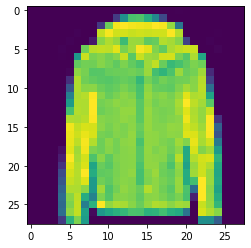

In [45]:
plt.imshow(training_images[0])

In [46]:
#reshape
training_images=training_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)
validation_images=validation_images.reshape(-1,28,28,1)

In [ ]:
#NOTE: >>can't use plt.imshow(training_images[0]) after reshaping for image viewing

In [48]:
model = keras.models.Sequential([
                                 
                    #layers.Conv2D(300,(3,3),activation="tanh",input_shape=(28,28,1)),
                    #layers.MaxPooling2D(2,2),
                                 
                    #Input shape has (batch_size, height, width, channels). 
                    #Incase of RGB image would have a channel of 3 and the greyscale image would have a channel of 1.

                    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)),
                    layers.MaxPooling2D((2, 2)),               

                    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
                    layers.MaxPooling2D((2, 2)),

                    layers.Flatten(),

                    layers.Dense(200,activation="relu"),
                    layers.Dense(180,activation="relu"),
                    layers.Dense(100,activation="relu"),
                    layers.Dense(50,activation="relu"),
                    layers.Dense(10,activation="softmax")
])

In [49]:
#compile model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [50]:
#fit model
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4986 - accuracy: 0.8129
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3157 - accuracy: 0.8842
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2657 - accuracy: 0.9020
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2352 - accuracy: 0.9135
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2048 - accuracy: 0.9233
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1837 - accuracy: 0.9319
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1649 - accuracy: 0.9385
Epoch 8/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1477 - accuracy: 0.9447
Epoch 9/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1358 - accuracy: 0.9487
Epoch 10/10
1719/1719 [==============================] - 11s 7ms/step - l

In [83]:
#prediction/evaluation
model.evaluate(test_images,test_labels)
model.evaluate(validation_images,validation_labels)

157/157 [==============================] - 1s 4ms/step - loss: 0.2589 - accuracy: 0.9120


[0.2588546574115753, 0.9120000004768372]

In [88]:
k=model.predict(test_images[0:5])
print("Prediction: ")
print("-------------------------------")
print(np.argmax(k[0]),np.argmax(k[1]),np.argmax(k[2]),np.argmax(k[3]),np.argmax(k[4]))
print("-------------------------------")
print("Answer: ",test_labels[0:5])

Prediction: 
-------------------------------
9 2 1 1 6
-------------------------------
Answer:  [9 2 1 1 6]


In [ ]:
#summary
model.summary()